In [30]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('zomato1.csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [31]:
indian_cities=df[df["Country Code"]==1] # dataframe where ountry code is for india
l=[]
for i in range(indian_cities.shape[0]):
    if indian_cities.iloc[i].City in ["New Delhi","Gurgaon","Faridabad","Noida","Gaziabad"]:
        l.append(i)

ncr=len(l)    

In [32]:
rest_of_india=indian_cities.shape[0]-ncr
rest_of_india

730

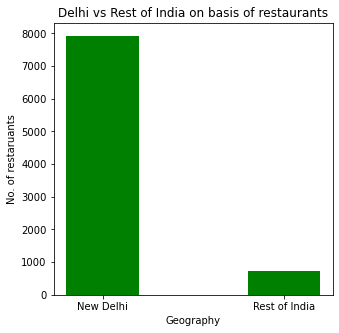

In [33]:
fig = plt.figure(figsize = (5, 5))
plt.bar(["New Delhi","Rest of India"],[ncr,rest_of_india],color="green",width=0.4)
plt.xlabel("Geography")
plt.ylabel("No. of restaruants")
plt.title("Delhi vs Rest of India on basis of restaurants")
plt.show()

2. Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.
Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR 
or just it due to incomplete dataset.

In [34]:
indian_cities=df[df["Country Code"]==1] # dataframe where ountry code is for india
del_cus=[]
rest_cus=[]
for i in range(indian_cities.shape[0]):
    if indian_cities.iloc[i].City in ["New Delhi","Gurgaon","Faridabad","Noida","Gaziabad"]:
        temp=[]
        mak=indian_cities.iloc[i].Cuisines.split(',') # splitting by comma 
        for b in mak:
            temp.append(b.strip())
        del_cus.extend(temp)
    else:
        temp=[]
        mak=indian_cities.iloc[i].Cuisines.split(',')
        for b in mak:
            temp.append(b.strip())
        rest_cus.extend(temp)
        
        
not_present=[]

for i in rest_cus:
    if i not  in del_cus: # cusines not in delhi cusines
        not_present.append(i)
        
not_present        # these are the cusine not present in delhi ncr

['German', 'Malwani', 'German', 'BBQ', 'Cajun']

In [35]:
import requests
headers = {'user-key': '1916a1cbf9ae3cca094d599c14b5bd23'}
url = "https://developers.zomato.com/api/v2.1/cuisines?city_id=1"
response = requests.get(url,headers=headers)
cuisines = response.json()['cuisines']

# Indicates whether cuisine present in Delhi-NCR or not
check_present = False
for cuisine in cuisines:
    if cuisine['cuisine']['cuisine_name'] in del_cus:
        check_present = True
        break
    
# True indicates dataset has missing values. False indicates there is no missing values.     
print(check_present)

True


Q 1.3)Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [36]:
indian_cities=df[df["Country Code"]==1] # dataframe where ountry code is for india
del_cus=[]
rest_cus=[]
for i in range(indian_cities.shape[0]):
    if indian_cities.iloc[i].City in ["New Delhi","Gurgaon","Faridabad","Noida","Gaziabad"]:
        temp=[]
        mak=indian_cities.iloc[i].Cuisines.split(',')
        for b in mak:
            temp.append(b.strip())
        del_cus.extend(temp)
    else:
        temp=[]
        mak=indian_cities.iloc[i].Cuisines.split(',')
        for b in mak:
            temp.append(b.strip())
        rest_cus.extend(temp)
        
        
del_cus# cuisines of delhi

['Chinese',
 'Fast Food',
 'Bakery',
 'North Indian',
 'Chinese',
 'North Indian',
 'North Indian',
 'Bakery',
 'Chinese',
 'North Indian',
 'Fast Food',
 'Mithai',
 'North Indian',
 'North Indian',
 'Mughlai',
 'Chinese',
 'Cafe',
 'Fast Food',
 'North Indian',
 'Raw Meats',
 'North Indian',
 'Fast Food',
 'Fast Food',
 'Chinese',
 'North Indian',
 'North Indian',
 'Chinese',
 'North Indian',
 'North Indian',
 'Mughlai',
 'Fast Food',
 'Burger',
 'North Indian',
 'South Indian',
 'Gujarati',
 'Rajasthani',
 'Chinese',
 'Thai',
 'Burger',
 'Desserts',
 'Fast Food',
 'Cafe',
 'Desserts',
 'Desserts',
 'Fast Food',
 'American',
 'Fast Food',
 'Salad',
 'Healthy Food',
 'American',
 'Fast Food',
 'Burger',
 'North Indian',
 'Chinese',
 'Ice Cream',
 'Desserts',
 'Fast Food',
 'South Indian',
 'North Indian',
 'Chinese',
 'North Indian',
 'Mughlai',
 'South Indian',
 'Desserts',
 'Ice Cream',
 'Fast Food',
 'North Indian',
 'Chinese',
 'Cafe',
 'North Indian',
 'Mughlai',
 'Chinese',
 'Mit

In [37]:
del_cus=pd.Series(del_cus)# converting list of cusines of ncr to pandas series
rest_cus=pd.Series(rest_cus) # converting lisr of cusine of rest of indian to pandas series


In [38]:
del_cus.value_counts()[:10] # top cusines of ncr

North Indian    3587
Chinese         2442
Fast Food       1858
Mughlai          931
Bakery           695
South Indian     566
Continental      546
Desserts         539
Street Food      537
Italian          535
dtype: int64

In [39]:
rest_cus.value_counts()[:10] # top cusines of rest of india

North Indian    359
Chinese         248
Continental     178
Italian         147
Cafe            140
Fast Food       105
South Indian     65
Mughlai          61
Desserts         58
Mexican          50
dtype: int64

4. Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India.
Plot the suitable graph to explain your inference.

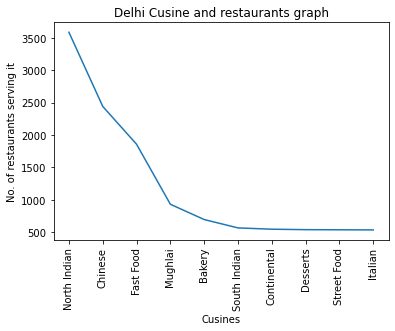

In [56]:
plt.plot(del_cus.value_counts()[:10].index,del_cus.value_counts()[:10].values) #plotting graph
plt.xticks(rotation=90)
plt.title("Delhi Cusine and restaurants graph")
plt.xlabel("Cusines")
plt.ylabel("No. of restaurants serving it")
plt.show()

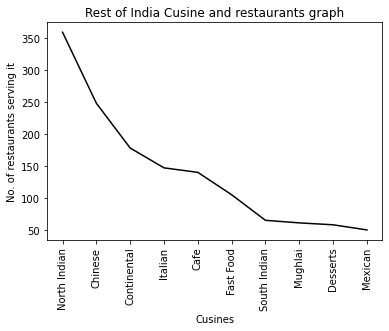

In [59]:
plt.plot(rest_cus.value_counts()[:10].index,rest_cus.value_counts()[:10].values,color="black")
plt.xticks(rotation=90)
plt.title("Rest of India Cusine and restaurants graph")
plt.xlabel("Cusines")
plt.ylabel("No. of restaurants serving it")
plt.show()

From the graph we can see that North Indian, Chinese Cuisine are servered most in both places. But number of
restaurants serves has a huge difference, North Indian cuisinse is served by more than 3500 restaurants in Delhi NCR
but this data changes drastically in Rest of India, and that is only 350 or so and same goes for Chinese cuisine. 
Third most servered cuisine in Delhi NCR is Fast Food wherein Rest India is Continental and there is some order difference
in terms of restaurant serves. There are total 86 different cuisines that are offered in Delhi-NCR wherein Rest India offers
70 different cuisines.

Q2) User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.
Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
1. Number of Votes given Restaurant

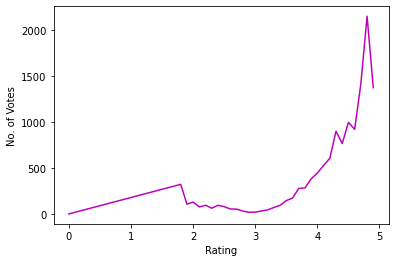

In [83]:
zomatodf = pd.read_csv("zomato1.csv")

zomatodf = zomatodf[zomatodf['Country Code']==1]  # for india as country 
zomatodf['Rating with Votes'] = zomato_df['Aggregate rating'].astype(str) + "###" + zomato_df['Votes'].astype(str)


range_with_votes = {}

def get_counts(rating_and_votes):
    rating = round(float(rating_and_votes.split("###")[0]),2)
    votes = int(float(rating_and_votes.split("###")[1]))
    if rating not in range_with_votes:
        range_with_votes[rating] = [votes,1]
    else:
        range_with_votes[rating][0]+=votes
        range_with_votes[rating][1]+=1
    

zomatodf['Rating with Votes'].apply(get_counts)

total_votes_rating = [[key,value[0]//value[1]] for key,value in range_with_votes.items()]

total_votes_rating.sort()
total_votes = [i[1] for i in total_votes_rating]
rating = [i[0] for i in total_votes_rating]

plt.plot(rating,total_votes,color="m")
plt.xlabel("Rating")
plt.ylabel("No. of Votes")
plt.show()

Restaurant serving more number of cuisines.

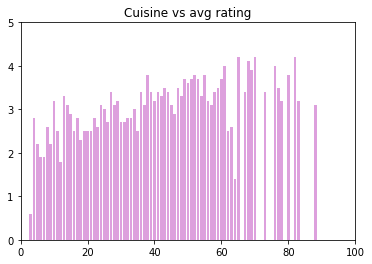

In [78]:
import numpy as np
rat = np.array(zomato_df['Aggregate rating'])
cuis = np.array(zomato_df['Cuisines'])
rating_with_no_cuisines = {}


for i in range(len(rat)):
    no_cuisines = len(cuis[i])
    if no_cuisines not in rating_with_no_cuisines:
        rating_with_no_cuisines[no_cuisines] = [[rat[i]],1]
    else:
        rating_with_no_cuisines[no_cuisines][0].append(rat[i])
        rating_with_no_cuisines[no_cuisines][1]+=1

no_cuisines_with_avg_rating = []

for key, value in rating_with_no_cuisines.items():
    avg_rating = round(sum(value[0])/value[1],1)
    no_cuisines_with_avg_rating.append([key,avg_rating])
no_cuisines_with_avg_rating.sort(reverse=True)
no_cuisines_present = [i[0] for i in no_cuisines_with_avg_rating]
avg_ratings = [i[1] for i in no_cuisines_with_avg_rating]

plt.bar(no_cuisines_present,avg_ratings,color="plum") # Bar graph can be used. 
plt.axis([0,100,0,5])
plt.title("Cuisine vs avg rating")

plt.show()

Average Cost of Restaurant

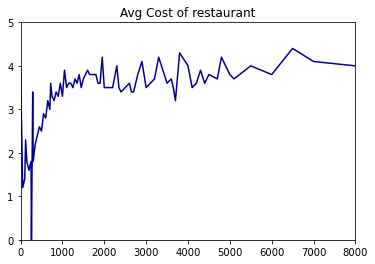

In [73]:
ratings = np.array(zomato_df['Aggregate rating'])
cost_of_two = np.array(zomato_df['Average Cost for two'])


rating_cost_of_two = {}


for i in range(len(ratings)):
    if cost_of_two[i] not in rating_cost_of_two:
        rating_cost_of_two[cost_of_two[i]] = [[ratings[i]],1]
    else:
        rating_cost_of_two[cost_of_two[i]][0].append(ratings[i])
        rating_cost_of_two[cost_of_two[i]][1]+=1

cost_of_two_with_avg_rating = []

for key, value in rating_cost_of_two.items():
    avg_rating = round(sum(value[0])/value[1],1)
    cost_of_two_with_avg_rating.append([key,avg_rating])
cost_of_two_with_avg_rating.sort(reverse=True)
cost_of_two = [i[0] for i in cost_of_two_with_avg_rating]
avg_ratings = [i[1] for i in cost_of_two_with_avg_rating]

plt.plot(cost_of_two,avg_ratings,color="darkblue")
plt.axis([0,8000,0,5])
plt.title("Avg Cost of restaurant")
plt.show()

In [ ]:
Restaurant serving some specific cuisines.

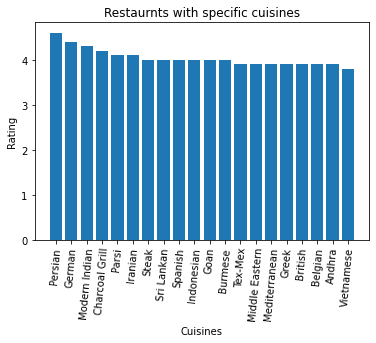

In [74]:
cuisines_with_rating = {} 
ratings = np.array(zomato_df['Aggregate rating'])
cuisines = np.array(zomato_df['Cuisines'])

for i in range(len(cuisines)):
    cuisine_list = cuisines[i].split(', ')
    for cuisine in cuisine_list:
        if cuisine not in cuisines_with_rating:
            cuisines_with_rating[cuisine] = [[ratings[i]],1]
        else:
            cuisines_with_rating[cuisine][0].append(ratings[i])
            cuisines_with_rating[cuisine][1]+=1

cuisines_ratings = [ [round(sum(value[0])/value[1],1),key] for key,value in cuisines_with_rating.items()]

cuisines_ratings.sort(reverse=True)
cuisines = []
ratings = []
for i in cuisines_ratings:
    cuisines.append(i[1])
    ratings.append(i[0])

plt.bar(cuisines[0:20],ratings[0:20])
plt.xticks(rotation=85)
plt.xlabel("Cuisines")
plt.ylabel("Rating")
plt.title("Restaurnts with specific cuisines")
plt.show()

Find the weighted restaurant rating of each locality and find out the top 10 localities 
with more weighted restaurant rating?

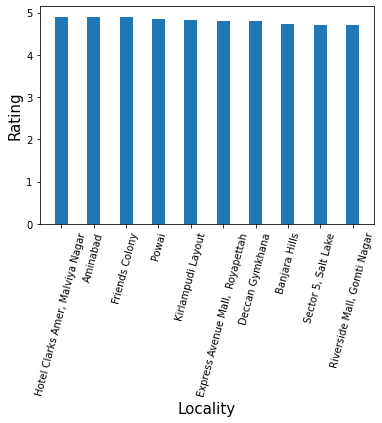

In [86]:
locality_dict = {}


localities = np.array(zomato_df['Locality'])
restaurants = np.array(zomato_df['Restaurant Name']) 
ratings = np.array(zomato_df['Aggregate rating'])
votes = np.array(zomato_df['Votes'])

for i in range(len(localities)):
    if votes[i]!=0:
        if localities[i] not in locality_dict:
            locality_dict[localities[i]] = [votes[i]*ratings[i],votes[i]]
        else:
            locality_dict[localities[i]][0] += votes[i]*ratings[i]
            locality_dict[localities[i]][1] += votes[i]

        

locality_ratings = []
for key,value in locality_dict.items():
    weighted_rating = round(value[0]/value[1],2)
    locality_ratings.append([weighted_rating,key])

locality_ratings.sort(reverse=True)
localities = [ i[1] for i in locality_ratings][0:10]
ratings = [ i[0] for i in locality_ratings][0:10]

plt.bar(localities,ratings,width=0.4)
plt.xticks(rotation=75)
plt.ylabel("Rating", size = 15)
plt.xlabel("Locality", size = 15)
plt.show()

Q3)Plot the bar graph top 15 restaurants have a maximum number of outlets

In [41]:
top_15=df["Restaurant Name"].value_counts()[:15] # getting top 15 restaurants via value counts which puts them in desceding order

In [42]:
shops=top_15.index
outlets=top_15.values

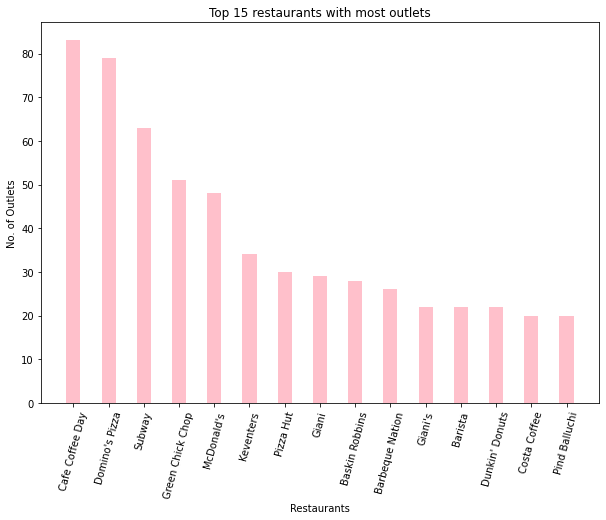

In [43]:
fig = plt.figure(figsize = (10, 7)) #plotting the graph between restauransts and its outlets
plt.bar(shops,outlets,color="pink",width=0.4)
plt.xlabel("Restaurants")
plt.ylabel("No. of Outlets")
plt.title("Top 15 restaurants with most outlets")
plt.xticks(rotation = 75)
plt.show()

Q3.2) Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant)

In [44]:
vals=df['Aggregate rating'].values # getting values from df["Aggregate rating"] series

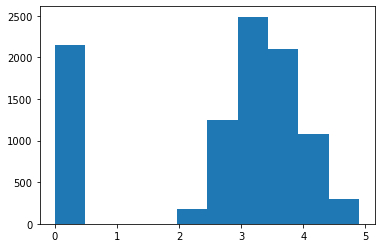

In [45]:
plt.hist(vals)
plt.show() 

Q3.3)Plot the bar graph top 10 restaurants in the data with the highest number of votes.

In [46]:
sorted_by_votes=df.sort_values(by="Votes",ascending = False)

In [47]:
res_name=sorted_by_votes[:10]["Restaurant Name"]
ratings=sorted_by_votes[:10]['Votes']

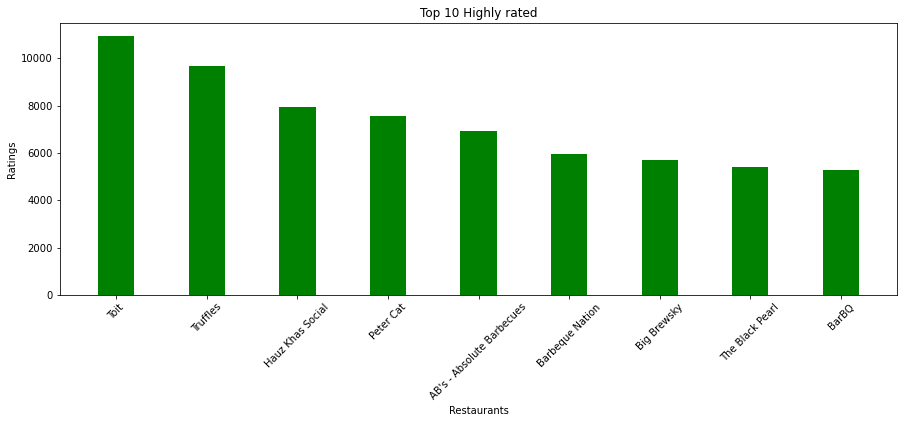

In [48]:
fig = plt.figure(figsize = (15, 5))
plt.bar(res_name,ratings,color="green",width=0.4)
plt.xlabel("Restaurants")
plt.ylabel("Ratings")
plt.title("Top 10 Highly rated")
plt.xticks(rotation = 45)
plt.show()

Plot the pie graph of top 10 cuisines present in restaurants in the USA.

In [49]:
usa_cities=df[df["Country Code"]==216]

In [50]:
usa_cities['Cuisines'].fillna("",inplace=True)

C:\Users\prajj\Anaconda3\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [51]:
cusine=[]
for i in range(usa_cities.shape[0]):
        if usa_cities.iloc[i].Cuisines=="":
            continue;
        temp=[]
        mak=usa_cities.iloc[i].Cuisines.split(',')
        for b in mak:
            temp.append(b.strip())
        cusine.extend(temp)
cusine        

['BBQ',
 'Burger',
 'Seafood',
 'American',
 'BBQ',
 'Mexican',
 'Coffee and Tea',
 'Sandwich',
 'Fast Food',
 'Asian',
 'Chinese',
 'Vegetarian',
 'Pizza',
 'Bar Food',
 'Sandwich',
 'Steak',
 'Tapas',
 'Bar Food',
 'Chinese',
 'Seafood',
 'Vegetarian',
 'Chinese',
 'American',
 'Burger',
 'Sandwich',
 'American',
 'Steak',
 'Japanese',
 'Steak',
 'Sushi',
 'Japanese',
 'Steak',
 'Sushi',
 'Seafood',
 'Tapas',
 'Bar Food',
 'Italian',
 'Pizza',
 'American',
 'Breakfast',
 'Diner',
 'American',
 'Southern',
 'Southwestern',
 'Southern',
 'Mexican',
 'Japanese',
 'Korean',
 'Breakfast',
 'Burger',
 'Sandwich',
 'Breakfast',
 'Sandwich',
 'American',
 'Burger',
 'Sandwich',
 'American',
 'Italian',
 'Pizza',
 'American',
 'Italian',
 'Pizza',
 'American',
 'International',
 'Southern',
 'Vegetarian',
 'Sandwich',
 'Italian',
 'Asian',
 'Japanese',
 'Sushi',
 'Mexican',
 'Spanish',
 'International',
 'Southern',
 'Bar Food',
 'Italian',
 'Pizza',
 'Sandwich',
 'Burger',
 'Bar Food',
 'Des

In [52]:
usa_cus=pd.Series(cusine)

In [53]:
top_10=usa_cus.value_counts()[:10]

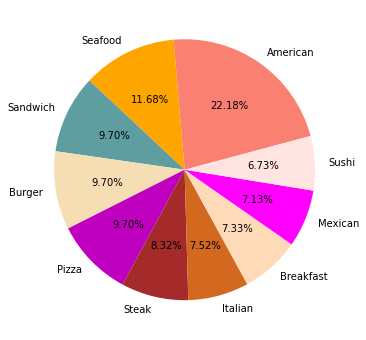

In [54]:
fig = plt.figure(figsize =(8, 6))
colors = ( "salmon", "orange", "cadetblue","wheat", "m","brown","chocolate","peachpuff","magenta","mistyrose")
plt.pie(top_10.values,labels=top_10.index,autopct='%.2f%%',startangle=15,colors=colors)
plt.show()

Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble

In [88]:
city_dict = {}

cities = np.array(indian_cities['City'])
ratings = np.array(indian_cities['Aggregate rating'])
votes = np.array(indian_cities['Votes'])

for i in range(len(cities)):
    if votes[i]!=0:
        if cities[i] not in city_dict:
            city_dict[cities[i]] = [votes[i]*ratings[i],votes[i],1]
        else:
            city_dict[cities[i]][0] += votes[i]*ratings[i]
            city_dict[cities[i]][1] += votes[i]
            city_dict[cities[i]][2] +=1

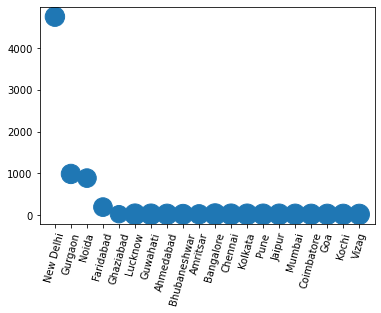

In [91]:
city_ratings = []
for key,value in city_dict.items():
    city = key
    weighted_rating = round(value[0]/value[1],2) # getting weghted average
    city_ratings.append([value[2],weighted_rating,key])
    
city_ratings.sort(reverse=True) # sorting on deceding order by ratings
cities = np.array([ i[2] for i in city_ratings][0:20])
ratings = np.array([ i[1] for i in city_ratings][0:20])
counts = np.array([ i[0] for i in city_ratings][0:20])
ratings[ratings[0]<0] = -ratings[0]


plt.scatter(cities,counts,s=ratings*100)# plotting the graph
plt.xticks(rotation=75)
plt.show()
